# MIS 581 Capstone Project
## Purpose: 
### Exploration and analysis of selected data set

In [100]:
%config IPCompleter.greedy=True
from sys import stdout
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from math import floor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from scipy import stats
import random
from datetime import datetime

In [2]:
#default color palette
sns.set_palette('deep')

In [3]:
ms_telemetry = pd.read_csv('data/Microsoft Dataset/predictive modeling telemetry.csv')
ms_telemetry['datetime'] = pd.to_datetime(ms_telemetry['datetime'], format='%m/%d/%Y %I:%M:%S %p')
ms_telemetry.set_index(['datetime','machineID'], inplace=True)
ms_telemetry

,,volt,rotate,pressure,vibration
datetime,machineID,,,,
2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...
2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561


In [4]:
ms_telemetry.describe()

,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000
mean,170.777736,446.605119,100.858668,40.385007
std,15.509114,52.673886,11.048679,5.370361
min,97.333604,138.432075,51.237106,14.877054
25%,160.304927,412.305714,93.498181,36.777299
50%,170.607338,447.558150,100.425559,40.237247
75%,181.004493,482.176600,107.555231,43.784938
max,255.124717,695.020984,185.951998,76.791072


In [5]:
ms_machines = pd.read_csv('data/Microsoft Dataset/predictive modeling machines.csv')
ms_machines = ms_machines.set_index(['machineID', 'age', 'model'])
ms_machines

,,
machineID,age,model
1,18,model3
2,7,model4
3,8,model3
4,7,model3
5,2,model3
...,...,...
96,10,model2
97,14,model2
98,20,model2


In [6]:
ms_error = pd.read_csv('data/Microsoft Dataset/predictive modelling errors.csv')
ms_error['datetime'] = pd.to_datetime(ms_error['datetime'], format='%m/%d/%Y %I:%M:%S %p')
ms_error.set_index(['datetime', 'machineID', 'errorID'], inplace=True)
ms_error['error_count'] = 1
ms_error

,,,error_count
datetime,machineID,errorID,
2015-01-03 07:00:00,1,error1,1
2015-01-03 20:00:00,1,error3,1
2015-01-04 06:00:00,1,error5,1
2015-01-10 15:00:00,1,error4,1
2015-01-22 10:00:00,1,error4,1
...,...,...,...
2015-11-21 08:00:00,100,error2,1
2015-12-04 02:00:00,100,error1,1
2015-12-08 06:00:00,100,error2,1


In [7]:
ms_failure = pd.read_csv('data/Microsoft Dataset/predictive modelling failures.csv')
ms_failure['datetime'] = pd.to_datetime(ms_failure['datetime'], format='%m/%d/%Y %I:%M:%S %p')
ms_failure.set_index(['datetime', 'machineID', 'failure'], inplace=True)
ms_failure['failure_count'] = 1
ms_failure

,,,failure_count
datetime,machineID,failure,
2015-01-05 06:00:00,1,comp4,1
2015-03-06 06:00:00,1,comp1,1
2015-04-20 06:00:00,1,comp2,1
2015-06-19 06:00:00,1,comp4,1
2015-09-02 06:00:00,1,comp4,1
...,...,...,...
2015-11-29 06:00:00,99,comp3,1
2015-12-14 06:00:00,99,comp4,1
2015-02-12 06:00:00,100,comp1,1


In [8]:
def set_error(errorID = "all"):
    
    global ms_telemetry
    global ms_error
    
    #set period to day
    tel = ms_telemetry
    tel = tel.reset_index('machineID')#.groupby('machineID', group_keys=False)#.resample('D').mean()
    tel = tel.to_period('D')
    tel = tel.reset_index().set_index(['datetime', 'machineID'])
    tel = tel.mean(level=[0,1])
 
    if errorID == "all":
        err = ms_error #for all errors
    else:
        err = ms_error[ms_error.index.get_level_values(2).isin([errorID])]


    #consolideate errors and set period to day
    err = err.reset_index(['errorID', 'machineID'])
    err = err.drop(columns = 'errorID')
    err = err.to_period('D')
    err = err.reset_index().set_index(['datetime', 'machineID'])
    err = err.sum(level=[0,1]) #consolidate the errors

    err['has_error'] = (err['error_count'] > 0).astype(int)

    complete = tel.join(err, how='left').fillna(value=0)
    
    #create the error event window
    #NOTE: this excludes the error day
    complete = complete.reset_index().set_index('machineID')
    complete['pre_error'] = complete.groupby('machineID')['has_error'].shift(-10).fillna(value=0)
    #all error days are excluded, only days prior to error included
    complete.loc[complete['error_count'] > 0, 'pre_error'] = 0
    complete = complete.reset_index().set_index(['datetime','machineID'])
    
    continuous_only = tel
    
    return (complete, continuous_only)

complete, continuous = set_error('error1')
complete


,,volt,rotate,pressure,vibration,error_count,has_error,pre_error
datetime,machineID,,,,,,,
2015-01-01,1,167.576533,440.515328,98.522345,40.049623,0.0,0.0,0.0
2015-01-02,1,169.795758,446.832666,98.454608,39.271645,0.0,0.0,0.0
2015-01-03,1,171.862244,459.204742,97.998233,48.074091,1.0,1.0,0.0
2015-01-04,1,174.792428,448.743201,101.452266,52.190268,0.0,0.0,0.0
2015-01-05,1,171.018408,454.822750,102.363114,43.330311,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2015-12-28,100,170.982029,454.875385,97.864404,39.221774,0.0,0.0,0.0
2015-12-29,100,167.114444,459.097599,97.531682,40.117173,0.0,0.0,0.0
2015-12-30,100,168.613777,455.140822,98.415400,39.995452,0.0,0.0,0.0


In [179]:
def set_failure(failureID = "all", lag=1):
    
    global ms_telemetry
    global ms_failure
    
    #set period to day
    tel = ms_telemetry
    tel = tel.reset_index('machineID')#.groupby('machineID', group_keys=False)#.resample('D').mean()
    tel = tel.to_period('D')
    tel = tel.reset_index().set_index(['datetime', 'machineID'])
    tel = tel.mean(level=[0,1])
 
    if failureID == "all":
        fail = ms_failure #for all errors
    else:
        fail = ms_failure[ms_failure.index.get_level_values(2).isin([failureID])]

    #consolideate failures and set period to day
    fail = fail.reset_index(['machineID', 'failure'])
    fail = fail.drop(columns = 'failure')
    fail = fail.to_period('D')
    fail = fail.reset_index().set_index(['datetime', 'machineID'])
    fail = fail.sum(level=[0,1]) #consolidate the failures
    
    fail['has_failure'] = (fail['failure_count'] > 0).astype(int)

    complete = tel.join(fail, how='left').fillna(value=0)
    
    #create the error event window
    #NOTE: this excludes the error day
    complete = complete.reset_index().set_index('machineID')
    complete['predict'] = complete.groupby('machineID')['has_failure'].shift(-abs(lag)).fillna(value=0)
    #all error days are excluded, only days prior to error included
    complete.loc[complete['failure_count'] > 0, 'predict'] = 0
    complete = complete.reset_index().set_index(['datetime','machineID'])
    
    
    #create the number of days before failures
    # set next failure date
    copy = complete.copy()
    failures = copy[copy['has_failure'] == 1]
    failures = failures.reset_index()
    failures['next_failure_date'] = failures['datetime']
    failures = failures.set_index(['datetime', 'machineID'])

    copy = copy.join(failures['next_failure_date'])
    copy = copy.sort_index()
    copy.update(copy['next_failure_date'].groupby(level=1).bfill()) #use backfill to fill in the dates
    copy = copy.reset_index()
    #copy.apply(lambda x: x['next_failure_date'] - x['datetime'])

    def doit(x):
        if pd.isnull(x):
            return x
        return x.to_timestamp()


    copy['days_to_failure'] = (copy['next_failure_date'].apply(lambda x: doit(x)) - copy['datetime'].apply(lambda x: doit(x))).dt.days
    
    copy = copy.set_index(['datetime', 'machineID'])
    
    complete = copy

    continuous_only = tel
    
    return (complete, continuous_only)

complete, continuous = set_failure('comp1')
complete[complete['predict'] == 1]


volt      rotate    pressure  vibration  \
datetime   machineID                                                  
2015-01-01 16         194.758368  438.412863  132.011410  38.840547   
           22         191.704563  463.219488   98.774212  41.778294   
           24         186.891145  439.410127   99.936648  37.308995   
           35         191.287604  435.613472  101.717804  39.315677   
           45         189.965978  359.991971   95.051913  53.187131   
...                          ...         ...         ...        ...   
2015-12-26 83         187.488537  353.150003   99.932193  41.058216   
2015-12-29 88         193.339690  456.062362   96.555156  40.526811   
2015-12-30 64         187.188279  458.172672   96.980588  39.937981   
           90         185.432593  446.753490  100.097071  38.705240   
           95         184.425696  426.108909   97.629984  39.518163   

                      failure_count  has_failure  predict next_failure_date  \
datetime   machineID                                                          
2015-01-01 16                   0.0          0.0      1.0        2015-01-02   
           22                   0.0          0.0      1.0        2015-01-02   
           24                   0.0          0.0      1.0        2015-01-02   
           35                   0.0          0.0      1.0        2015-01-02   
           45                   0.0          0.0      1.0        2015-01-02   
...                             ...          ...      ...               ...   
2015-12-26 83                   0.0          0.0      1.0        2015-12-27   
2015-12-29 88                   0.0          0.0      1.0        2015-12-30   
2015-12-30 64                   0.0          0.0      1.0        2015-12-31   
           90                   0.0          0.0      1.0        2015-12-31   
           95                   0.0          0.0      1.0        2015-12-31   

                      days_to_failure  
datetime   machineID                   
2015-01-01 16                     1.0  
           22                     1.0  
           24                     1.0  
           35                     1.0  
           45                     1.0  
...                               ...  
2015-12-26 83                     1.0  
2015-12-29 88                     1.0  
2015-12-30 64                     1.0  
           90                     1.0  
           95                     1.0  

[192 rows x 9 columns]

In [10]:
#feature scaling to balance the weight of each feature
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
complete, continuous = set_error('error4')
sc = StandardScaler()
scaled = sc.fit_transform(continuous)
scaled


array([[-0.67626489, -0.33741405, -0.49386149, -0.16353734],
       [-0.20834841,  0.01302444, -0.50815836, -0.54192659],
       [ 0.22736363,  0.69933425, -0.60448318,  3.73936919],
       ...,
       [-0.45756533,  0.47389851, -0.51643391, -0.18988474],
       [-0.48788142,  0.92328597,  0.20767076, -0.75823939],
       [ 1.03452957, -0.05017285, -0.70877622,  1.79686749]])

In [11]:
def run_lda(failureID = 'all'):

    complete, continuous = set_failure(failureID)
    
    sc = StandardScaler()
    scaled = sc.fit_transform(continuous)
    
    lda = LDA(n_components = 1)
    X = scaled
    Y = complete['predict']
    projected = lda.fit_transform(X, Y)#.transform(X)

    colors = ['navy', 'darkorange']
    #lw = 2
    projected
    df_proj = pd.DataFrame(projected, index = complete.index, columns=['projected'])
    df_scaled = pd.DataFrame(scaled, index = complete.index)
    df = df_scaled.join(df_proj)
    df = df.join(complete['predict'])
    df
    
    df2 = df
    df2 = df2.reset_index()
    df2 = df2.set_index(['machineID', 'predict'])
    df2 = df2.mean(level=[0,1])
    #df2 = df2.groupby(['pre_error']).mean().reset_index()
    df2 = df2.reset_index('predict')
    sns.barplot(x='predict', y='projected', data=df2)
    return (df)



In [ ]:
df = run_lda('all')
sns.pairplot(df, vars=list(df.columns))

In [ ]:
df = run_lda('comp1')
sns.pairplot(df, vars=list(df.columns))
#df[df['predict']==1]

In [ ]:
df = run_lda('comp2')
sns.pairplot(df, vars=list(df.columns))

In [ ]:
df = run_lda('comp3')
sns.pairplot(df, vars=list(df.columns))

In [ ]:
df = run_lda('comp4')
sns.pairplot(df, vars=list(df.columns))

In [12]:
complete, continuous = set_failure('comp1')
complete.has_failure = complete.has_failure.astype(int)
#joined.error_count = joined.error_count.astype(int)
complete.drop(columns='failure_count')
X = complete.iloc[:,:4]
target = complete['predict'].copy()
#target = target.reset_index(drop=True)

regr_pls = PLSRegression(n_components = 3)
PLS_score_X, PLS_score_Y=regr_pls.fit_transform(X,target)
PLS_loads=regr_pls.x_loadings_
PLS_score_X

array([[-0.67165348, -0.11376631, -0.38456469],
       [-0.22646507, -0.11408155, -0.72490931],
       [ 0.20434117, -2.599174  ,  2.82995858],
       ...,
       [-0.49689087, -0.48566993, -0.42984205],
       [-0.53628224,  0.1383835 , -0.5272965 ],
       [ 1.03110823, -1.43085739,  1.12009514]])

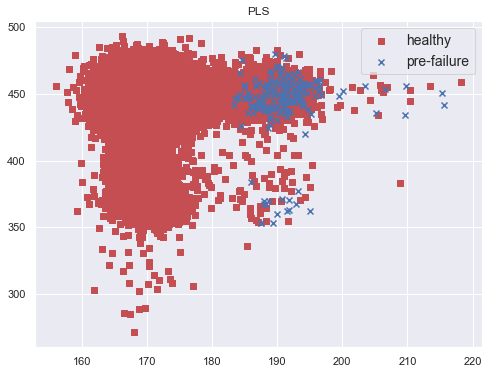

In [13]:
# Plot the transformed data
markers = ['s','x']
colors = ['r','b']
fig = plt.figure(figsize=(8,6))
ax0 = fig.add_subplot(111)
for l,m,c in zip(np.unique(target),markers,colors):
    if l==1:
        lab = 'pre-failure'
    else:
        lab= 'healthy'
    ax0.scatter(X['volt'][target==l],X['rotate'][target==l],c=c,marker=m, label=lab)
    #ax0.scatter(PLS_score_X.T[0][target==l],X['volt'][target==l],c=c,marker=m, label=lab)
    
plt.title('PLS')
plt.legend(fontsize=14)

In [151]:
#https://nirpyresearch.com/variable-selection-method-pls-python/

def pls_variable_selection(X, y, max_comp, diag=False):
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp,X.shape[1]))
    # Loop over the number of PLS components
    for i in range(max_comp):
        
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))
        
        # Sort spectra accordingly 
        Xc = X.iloc[:,sorted_ind]
        
        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc.iloc[:, j:], y)
          
            y_cv = cross_val_predict(pls2, Xc.iloc[:, j:], y, cv=5)
            mse[i,j] = mean_squared_error(y, y_cv)
    
        #comp = 100*(i+1)/(max_comp)
        #stdout.write("\r%d%% completed" % comp)
        #stdout.flush()
    #stdout.write("\n")
    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))
    if diag:
        print("Optimised number of PLS components: ", mseminx[0]+1)
        print("discarded features",mseminy[0])
        print('Optimised MSEP ', mse[mseminx,mseminy][0])
        stdout.write("\n")
    # plt.imshow(mse, interpolation=None)
    # plt.show()
    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y)
    #pls_score_x, pls_score_y = pls.fit_transform(X, y)
    
    #this sorts best feature last
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
    Xc = X.iloc[:,sorted_ind]
    
    y_cv = cross_val_predict(pls, Xc, y, cv=5)
    
    opt_x_component = Xc.iloc[:,mseminy[0]:]
    #pls_score_x_df = pd.DataFrame(y_cv.T[0], index=df.index, columns=['pls_score'])

    return(opt_x_component,y_cv, mseminx[0]+1,mseminy[0], sorted_ind)

100% completed
Optimised number of PLS components:  2
discarded features 1
Optimised MSEP  0.004714996571080804



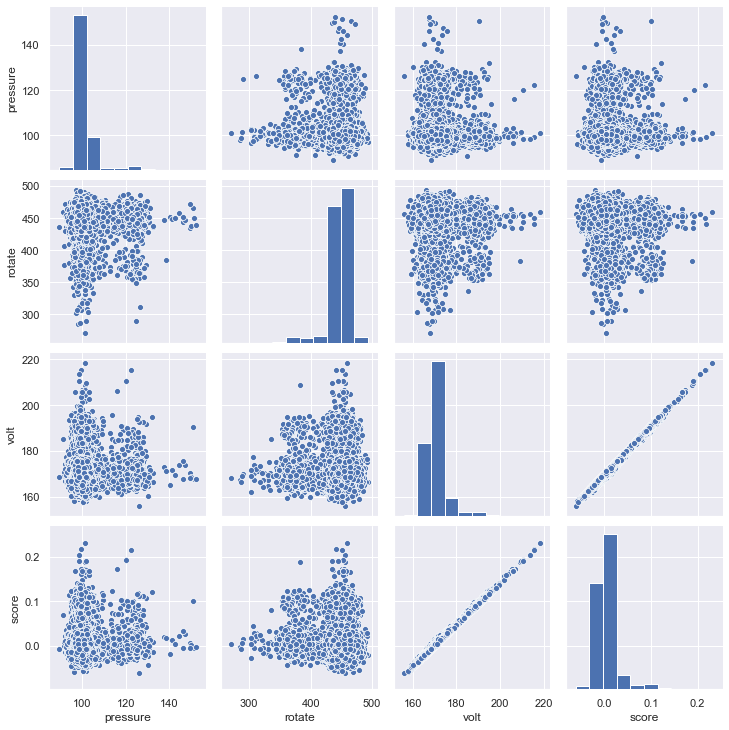

In [15]:
complete, continuous = set_failure('comp1')

X=complete.iloc[:,:4]
y=complete['predict']

opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(X, y, 4)
opt_x_component['score'] = score_x
sns.pairplot(opt_x_component, vars=list(opt_x_component.columns))




In [ ]:
complete, continuous = set_failure('comp2')


X=complete.iloc[:,:4]
y=complete['predict']


opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(X, y, 4)
sns.pairplot(opt_x_component, vars=list(opt_x_component.columns))


In [ ]:
complete, continuous = set_failure('comp3')


X=complete.iloc[:,:4]
y=complete['predict']


opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(X, y, 4)
sns.pairplot(opt_x_component, vars=list(opt_x_component.columns))
print("selected ", sorted_ind)
X.iloc[:,sorted_ind].iloc[:,-1:]

In [ ]:
complete, continuous = set_failure('comp4')


X=complete.iloc[:,:4]
y=complete['predict']


opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(X, y, 4)
sns.pairplot(opt_x_component, vars=list(opt_x_component.columns))


In [264]:
def prep_data(df, pre_failure_window = 10):
    
    df['pre_failure'] = df['days_to_failure'] <= pre_failure_window
    df['pre_failure'].apply(lambda x: int(x == True))
   
    x=df.iloc[:,:4]
    y=df['predict']

    opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(x, y, 4)

    #last element is the top feature
    selected_index = sorted_ind[len(sorted_ind) - 1];

    #optimal_component = opt_x_component.join(complete.loc[:,('pre_error','has_error')])

    error_window = df[df['predict'] == 1]

    #filter out the failure window and failures for non-error runs
    non_error_window = df[df['pre_failure'] < 1] 
    non_error_window = non_error_window[non_error_window['has_failure'] < 1] 

    window_count = error_window['predict'].count()
    
    #X=random.sample(non_error_window.iloc[:,selected_index].tolist(), window_count)
    #Y=error_window.iloc[:,selected_index].tolist()
    
    X=non_error_window.iloc[:,selected_index].tolist()
    Y=error_window.iloc[:,selected_index].tolist()
    return (X, Y)



In [141]:
complete, continuous = set_failure('comp3')

x=complete.iloc[:,:4]
y=complete['predict']

opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(x, y, 4)

#last element is the top feature
selected_index = sorted_ind[len(sorted_ind) - 1];

#optimal_component = opt_x_component.join(complete.loc[:,('pre_error','has_error')])

error_window = complete[complete['predict'] == 1]

#filter out the failure window and failures for non-error runs
non_error_window = complete[complete['predict'] < 1] 
non_error_window = non_error_window[non_error_window['has_failure'] < 1] 

window_count = error_window['predict'].count()

X=random.sample(non_error_window.iloc[:,selected_index].tolist(), window_count)
Y=error_window.iloc[:,selected_index].tolist()

t,p, zx, px, zy, py = run_ttest(X,y)
print("ttest_ind: t=%g p=%g" % (t,p))
#print("selected ", si)
#ew

100% completed
ttest_ind: t=3732.46 p=0


No handles with labels found to put in legend.


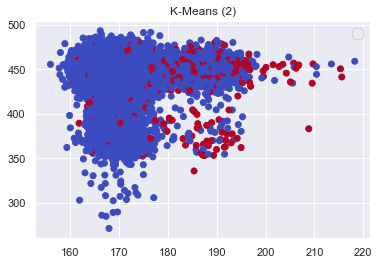

In [219]:
#Identify a boundary for pre-failure state
#use top identified feature
complete, continuous = set_failure('comp1')
prep_data(complete, 20)
X=complete.iloc[:,:4]
y=complete['predict']

opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(X, y, 4)
X2 = opt_x_component

#use k-means clustering on top component to find healthy/unhealthy boundary
kmeans = KMeans(n_clusters=2, random_state=0).fit(X2.iloc[:,[-1]])

#complete['pre_failure'] = kmeans.labels_



plt.scatter(complete['volt'], complete['rotate'], c=complete['pre_failure'], cmap='coolwarm')

#markers = ['s','x']
#colors = ['r','b']
#fig = plt.figure(figsize=(8,6))
#ax0 = fig.add_subplot(111)
#for l,m,c in zip(np.unique(kmeans.labels_),markers,colors):
#    if l==1:
#        lab = 'pre-failure'
#    else:
#        lab= 'healthy'
#    ax0.scatter(X2.iloc[:,[-1]][kmeans.labels_==l],X2.iloc[:,[-2]][kmeans.labels_==l],c=c,marker=m, label=lab)
#    
plt.title('K-Means (2)')
plt.legend(fontsize=14)

# add numbering of days prior to failure


In [222]:
# set next failure date
copy = complete.copy()
failures = copy[copy['has_failure'] == 1]
failures = failures.reset_index()
failures['next_failure_date'] = failures['datetime']
failures = failures.set_index(['datetime', 'machineID'])

copy = copy.join(failures['next_failure_date'])
copy = copy.sort_index()
copy.update(copy['next_failure_date'].groupby(level=1).bfill()) #use backfill to fill in the dates
copy = copy.reset_index()
#copy.apply(lambda x: x['next_failure_date'] - x['datetime'])


def doit(x):
    if pd.isnull(x):
        return x
    return x.to_timestamp()


copy['days_to_failure'] = (copy['next_failure_date'].apply(lambda x: doit(x)) - copy['datetime'].apply(lambda x: doit(x))).dt.days
avg_max_failure_days = math.floor(copy[copy['pre_failure'] ==1].groupby('machineID')['days_to_failure'].max().mean())
copy = copy.set_index(['datetime', 'machineID'])
complete = copy


ValueError: columns overlap but no suffix specified: Index(['next_failure_date'], dtype='object')

In [235]:
copy = complete.copy()
failures = copy[copy['has_failure'] == 1]
failures = failures.reset_index()
failures['next_failure_date'] = failures['datetime']
failures = failures.set_index(['datetime', 'machineID'])
failures['next_failure_date'].index.names
copy = copy.join(failures['next_failure_date'])

ValueError: columns overlap but no suffix specified: Index(['next_failure_date'], dtype='object')

In [96]:
#Test out different dates to check the data
#copy = copy.reset_index().set_index('machineID')
#copy = copy.sort_index(level=0)
#copy=copy.sort_values('datetime')
#copy.loc[22].head(20)
copy.loc(axis=0)['5/15/2015':,22]



,,volt,rotate,pressure,vibration,failure_count,has_failure,predict,pre_failure,next_failure_date,days_to_failure
datetime,machineID,,,,,,,,,,
2015-05-15,22,165.410297,446.809356,100.822980,39.299640,0.0,0.0,0.0,0,2015-05-22,7.0
2015-05-16,22,171.705982,460.999647,100.866718,38.985155,0.0,0.0,0.0,0,2015-05-22,6.0
2015-05-17,22,173.858826,442.277992,102.023254,40.031250,0.0,0.0,0.0,0,2015-05-22,5.0
2015-05-18,22,168.050214,454.346933,101.438120,39.952576,0.0,0.0,0.0,0,2015-05-22,4.0
2015-05-19,22,173.444790,466.293628,98.838408,41.500304,0.0,0.0,0.0,0,2015-05-22,3.0
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28,22,171.951312,445.290771,98.664299,38.101564,0.0,0.0,0.0,0,NaN,NaN
2015-12-29,22,166.009286,444.709197,99.047933,40.592783,0.0,0.0,0.0,0,NaN,NaN
2015-12-30,22,174.974549,452.178145,99.846893,39.613790,0.0,0.0,0.0,0,NaN,NaN


In [90]:
#test out different dates to check the data
df2 = complete.reset_index().set_index(['machineID'])
df2 = df2.sort_index(level=0)
df2 = df2[df2['has_failure']==1]
df2.loc[22]

,datetime,volt,rotate,pressure,vibration,failure_count,has_failure,predict,pre_failure
machineID,,,,,,,,,
22,2015-01-02,180.378534,468.724145,99.214614,39.306819,1.0,1.0,0.0,1
22,2015-05-22,177.833267,454.874978,108.937275,41.045225,1.0,1.0,0.0,0


In [267]:
df = pd.DataFrame(columns=['days_to_failure', 'p', 't', 'sample_size_y', 'normal-px', 'normal-zx', 'normal-py', 'normal-zy', 'var_stat', 'var_p'])

complete, continuous = set_failure('comp1', 1)

copy = copy.reset_index()
avg_max_failure_days = floor(copy[copy['pre_failure'] ==1].groupby('machineID')['days_to_failure'].max().mean())
copy = copy.set_index(['datetime', 'machineID'])

iterations = 20

#for i in range(floor(avg_max_failure_days)):
for i in range(1,iterations):

    complete = complete.reset_index('machineID')
    complete['predict'] = complete.groupby('machineID')['has_failure'].shift(-i).fillna(value=0)
    #all error days are excluded, only days prior to error included
    complete.loc[complete['failure_count'] > 0, 'predict'] = 0
    complete = complete.reset_index().set_index(['datetime', 'machineID'])
    
    X, Y = prep_data(complete, iterations)
    
    zx, px = stats.normaltest(X)
    zy, py = stats.normaltest(Y)
    vstat, vp = stats.bartlett(X, Y)    
    t,p=stats.ttest_ind(X, Y, equal_var=False)

    comp = 100*(i+1)/iterations
    stdout.write("\r%d%% completed" % comp)
    stdout.flush()
    #stdout.write("\n")
    
    df.loc[i] = [i+1, p, t, window_count, px, zx, py, zy, vstat, vp] 
#    print("ttest_ind - %g: t=%g p=%g" % (x,t,p))
df

100% completed

,days_to_failure,p,t,sample_size_y,normal-px,normal-zx,normal-py,normal-zy,var_stat,var_p
1,2.0,4.840847e-125,-58.758303,182.0,0.0,15382.804651,4.783248e-25,111.999015,3.843809,4.992997e-02
2,3.0,3.457115e-94,-41.274297,182.0,0.0,15382.804651,1.987838e-23,104.544819,6.411041,1.134129e-02
3,4.0,1.556913e-03,3.211125,182.0,0.0,23229.421589,2.863252e-20,89.999488,91.801818,9.580642e-22
4,5.0,5.798301e-04,3.501617,182.0,0.0,23229.421589,6.744569e-40,180.389332,50.930338,9.570287e-13
5,6.0,1.454650e-01,1.461976,182.0,0.0,25664.919678,1.812519e-46,210.648393,8.956903,2.764231e-03
6,7.0,3.652152e-03,-2.944684,182.0,0.0,18903.124188,4.264372e-21,93.807984,16.153120,5.842225e-05
7,8.0,5.303344e-02,1.947457,182.0,0.0,15382.804651,1.270271e-26,119.255964,1.877351,1.706355e-01
8,9.0,1.494267e-01,1.447750,182.0,0.0,15382.804651,3.788609e-26,117.070427,0.009246,9.233970e-01
9,10.0,2.222931e-01,-1.224704,182.0,0.0,23229.421589,1.773647e-29,132.403860,15.144286,9.959929e-05
10,11.0,2.087095e-02,-2.330727,182.0,0.0,18903.124188,4.129626e-23,103.082541,32.734937,1.056216e-08


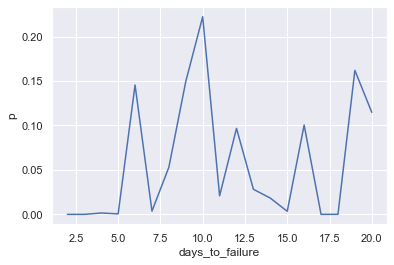

In [268]:
sns.lineplot(data=df, x='days_to_failure', y="p")
#avg_max_failure_days
#complete[complete['days_to_failure'] == 17].tail(20)
#complete[complete['has_failure'] == 1].loc['12/09/2015',:]